In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel("eletromag_7.xlsx")
df

,fem,t
0,14.55,0
1,14.24,5
2,13.95,10
3,13.66,15
4,13.38,20
...,...,...
127,1.09,640
128,1.06,645
129,1.04,650
130,1.02,655


In [19]:
y = np.array(df.iloc[:,0])
print(y)

[14.55 14.24 13.95 13.66 13.38 13.12 12.86 12.59 12.32 12.08 11.83 11.58
 11.34 11.12 10.9  10.68 10.45 10.24 10.04  9.82  9.63  9.42  9.23  9.04
  8.85  8.69  8.52  8.33  8.16  7.99  7.84  7.68  7.52  7.36  7.21  7.07
  6.93  6.78  6.64  6.5   6.38  6.26  6.12  6.09  5.85  5.74  5.63  5.52
  5.4   5.29  5.19  5.09  4.97  4.86  4.87  4.68  4.59  4.49  4.41  4.31
  4.22  4.14  4.06  3.97  3.89  3.81  3.74  3.66  3.59  3.51  3.44  3.37
  3.3   3.23  3.17  3.1   3.05  2.98  2.93  2.87  2.81  2.74  2.7   2.64
  2.58  2.54  2.48  2.43  2.38  2.34  2.29  2.25  2.2   2.15  2.12  2.06
  2.03  1.98  1.94  1.9   1.87  1.83  1.8   1.76  1.72  1.69  1.66  1.62
  1.59  1.56  1.53  1.49  1.46  1.44  1.41  1.38  1.39  1.33  1.3   1.27
  1.25  1.22  1.2   1.18  1.16  1.13  1.1   1.09  1.06  1.04  1.02  1.  ]


In [20]:
x = np.array(df.iloc[:,1])
print(x)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 360
 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445 450
 455 460 465 470 475 480 485 490 495 500 505 510 515 520 525 530 535 540
 545 550 555 560 565 570 575 580 585 590 595 600 605 610 615 620 625 630
 635 640 645 650 655 660]


In [21]:
#Erro da medição:
dpb = np.std(y, ddof=1)
sigma = dpb / np.sqrt(660)
print("Erro Estatístico é : {:.2f} V.".format(sigma))

Erro Estatístico é : 0.15 V.


In [29]:
x_samp = np.reshape(x,-1) 
y_samp = np.reshape(y,-1)
print(x_samp)
print(y_samp)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 360
 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445 450
 455 460 465 470 475 480 485 490 495 500 505 510 515 520 525 530 535 540
 545 550 555 560 565 570 575 580 585 590 595 600 605 610 615 620 625 630
 635 640 645 650 655 660]
[14.55 14.24 13.95 13.66 13.38 13.12 12.86 12.59 12.32 12.08 11.83 11.58
 11.34 11.12 10.9  10.68 10.45 10.24 10.04  9.82  9.63  9.42  9.23  9.04
  8.85  8.69  8.52  8.33  8.16  7.99  7.84  7.68  7.52  7.36  7.21  7.07
  6.93  6.78  6.64  6.5   6.38  6.26  6.12  6.09  5.85  5.74  5.63  5.52
  5.4   5.29  5.19  5.09  4.97  4.86  4.87  4.68  4.59  4.49  4.41  4.31
  4.22  4.14  4.06  3.97  3.89  3.81  3.74  3.66  3.59  3.51  3.44  3.37
  3.3   3.23  3.17  3.1  

In [33]:
#eq
def func(x,e0, R, C) :
    return 14.55*np.exp(-x/(220))

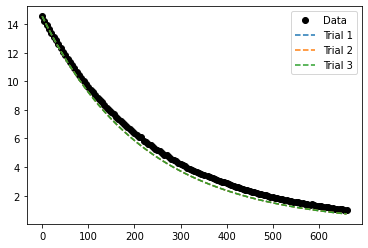

In [50]:
x_lin = np.linspace(0, x_samp.max(), 50) 
# SURVEY ----------------------------------------------------------------------
# Plotting Sampling Data
plt.plot(x_samp, y_samp, "ko", label="Data")

x_lin = np.linspace(0, x_samp.max(), 50)                   # a number line, 50 evenly spaced digits between 0 and max

# Trials
e0, R, C = 14.55, 1000000, 000.220
y_trial1 = func(x_lin,  e0,     R, C)
y_trial2 = func(x_lin, 10.53, 1000000, 000.300)
y_trial3 = func(x_lin, 5.238, 1000000, 239.8)

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
plt.plot(x_lin, y_trial2, "--", label="Trial 2")
plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.legend()

C:\Users\gonca\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Estimated Parameters [1.455e+01 1.000e+06 2.200e-01]


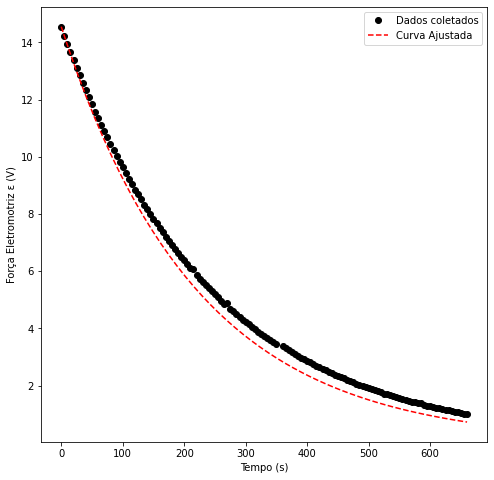

In [59]:
p0 = [14.55,1000000,000.220]
# REGRESSION ------------------------------------------------------------------ # guessed params
w, _ = opt.curve_fit(func, x_samp, y_samp, p0=p0)     
print("Estimated Parameters", w)  

# Model
y_model = func(x_lin, *w)

# PLOT ------------------------------------------------------------------------
# Visualize data and fitted curves
plt.figure(figsize=[8,8])
plt.plot(x_samp, y_samp,"ko", label="Dados coletados")
plt.plot(x_lin, y_model, "r--", label="Curva Ajustada")
plt.xlabel("Tempo (s)")
plt.ylabel("Força Eletromotriz ε (V)")
plt.legend()
plt.show()
